
# Binary Classification with Tensorflow 

We'll use the Bank Authentication Data Set from the UCI repository.

The data consists of 5 columns:

- variance of Wavelet Transformed image (continuous)
- skewness of Wavelet Transformed image (continuous)
- curtosis of Wavelet Transformed image (continuous)
- entropy of image (continuous)
- class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

### **Get the Data**

**Use pandas to read in the bank_note_data.csv file**


In [1]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\general_dfs\bank_note_data.csv')

**Check the head of the Data**

In [31]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [58]:
df.columns = ['image_var', 'image_skew', 'image_curt', 'entropy', 'class']


### **EDA**

We'll just do a few quick plots of the data.

**Import seaborn and set matplolib inline for viewing**


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

**Create a Countplot of the Classes (Authentic 1 vs Fake 0)**

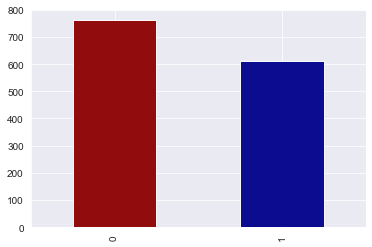

In [60]:
class_ = df['class'].value_counts()
class_.plot(kind='bar', colors=['darkred', 'darkblue'], alpha=0.95);

**Create a Scaterplot of the Data with MatplotLib **

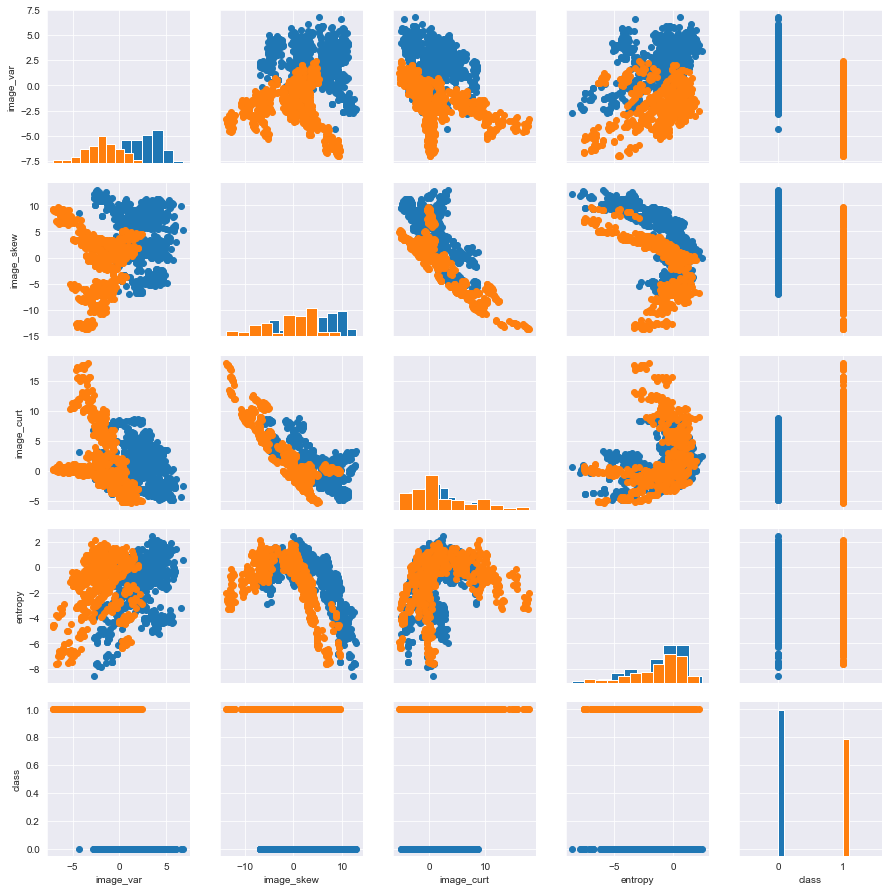

In [86]:
g = sns.PairGrid(df, hue='class')
g = g.map_diag(plt.hist)            #En el diagonal es donde se situa este hist
g = g.map_offdiag(plt.scatter)

## **Data Preparation**

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### **Standard Scaling**

**Import StandardScaler() from SciKit Learn**


In [100]:
from sklearn.preprocessing import StandardScaler
import tensorflow

**Create a StandardScaler() object called scaler.**


In [63]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

**Fit scaler to the features.**


In [64]:
model = scaler.fit(df)
model

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**


In [65]:
df_scaled = scaler.transform(df)
df_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135, -0.89472059],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744, -0.89472059],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317, -0.89472059],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418,  1.11766736],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848,  1.11766736],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ,  1.11766736]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**


In [66]:
names = list(df.columns)

In [67]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = names
df_scaled.head()

,image_var,image_skew,image_curt,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,-0.894721
1,1.447066,1.064453,-0.895036,-0.128767,-0.894721
2,1.207810,-0.777352,0.122218,0.618073,-0.894721
3,1.063742,1.295478,-1.255397,-1.144029,-0.894721
4,-0.036772,-1.087038,0.736730,0.096587,-0.894721


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## **Train Test Split**

**Create two objects X and y which are the scaled feature values and labels respectively.**


In [68]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]


**Use the .values method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series.**


In [69]:
X = X.values
y = y.values



**Use SciKit Learn to create training and testing sets of the data keeping 30% of data for test. Convert the ones in the categoriies to np.int32**


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## **Keras**

We're going to build a sequential model w/ three hidden layers w/ [10,20,10] structure, binary output class, and train it with 30 epochs w/ a batch size of 20.


In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow import keras


In [73]:
X_train.shape, y_train.shape

((960, 4), (960, 1))

In [74]:
# A sequential model where we stack layers on top of each other
network = models.Sequential()

In [75]:
# Stack 3 hidden layers and 1 output layer
network.add(layers.Dense(600,activation='relu', input_shape=(784,)))
network.add(layers.Dense(300, activation='softmax'))
network.add(layers.Dense(100, activation='softmax'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_9 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 682,410
Trainable params: 682,410
Non-trainable params: 0
_________________________________________________________________


**Let's use 'adam' as optimizer.**

In [76]:
# Now compile the method.
train_labels = to_categorical(X_train)
test_labels = to_categorical(y_train)

In [91]:
model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [93]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [102]:
# Iterate over the batches of a dataset.
for x in df_scaled:
    # Open a GradientTape.
    with tensorflow.GradientTape() as tape:
        # Forward pass.
        logits = model(x)
        # Loss value for this batch.
        loss_value = loss_fn(y, logits)

    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(loss_value, model.trainable_weights)

    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))# Iterate over the batches of a dataset.


AttributeError: 'str' object has no attribute '_keras_mask'

In [79]:
# Now fit the model
network.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## **Model Evaluation**

**Use the predict method from the classifier model to create predictions from X_test**

**Now create a classification report and a Confusion Matrix. Does anything stand out to you?**


In [80]:
y_predict = model.predict_classes(X_test)

AttributeError: 'StandardScaler' object has no attribute 'predict_classes'

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(y_test,y_predict))

NameError: name 'y_predict' is not defined

In [83]:
print(classification_report(y_test,y_predict))

NameError: name 'y_predict' is not defined


## **Models Comparison**

You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!

Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model


**It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN!**
